In [ ]:
### Grafos - Exercícios Aula 22/03/21; Prof. Raimir
Questão: Dado o grafo abaixo, identifique as pontes deste (se houver).
 
Algoritmo:
1. Verificar se o grafo se os graus dos vértices são todos pares ou 2 são ímpares;
2. Se todos os graus dos vértices forem par, começa em qualquer vértice, senão inicia por um dos vértices ímpar;
3. Para cada aresta, escolhe o caminho que não seja ponte, exceto se for a única alternativa;
4. Parar quando estiver percorrido todas as arestas;

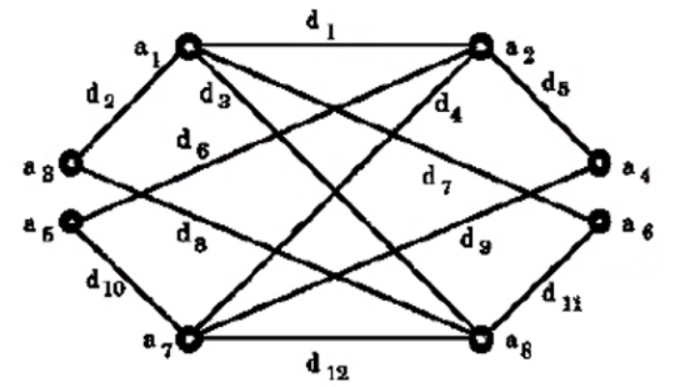

In [339]:
import networkx as nx

In [341]:
def mostra_caminho(caminho):
    # caminho=[1, 2, 4, 7, 2, 5, 7, 8, 1, 3, 8, 6, 1]
    G = nx.Graph()
    V = list(set(caminho))
    G.add_nodes_from(V)
    e2 = 1
    for e1 in range(len(caminho)-1):
        E.append((caminho[e1], caminho[e2]))
        if (e2 % 2) == 0:
            col = "k"
        else:
            col = "purple"
        G.add_edge(caminho[e1], caminho[e2], color=col, label=e2)
        e2 += 1
    edge_labels = nx.get_edge_attributes(G, 'label')
    colors = nx.get_edge_attributes(G,'color').values()
    pos=nx.circular_layout(G)
    # Create edge labels
    # labels = {e: str(e) for e in G.edges}
    nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b', edge_color=colors)
    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [342]:
# Verifica os graus de cada vértice e retorna lista de graus pares e lista de graus ímpares
def graus_grafo(G):
    graus_G = G.degree()
    list_par = [k for k,v in graus_G if (v % 2) == 0]
    list_impar = [k for k,v in graus_G if (v % 2) != 0]
    return list_par, list_impar

In [343]:
# Definir onde inicia o caminho/ciclo
def vertice_inicio(G):
    pares, impares = graus_grafo(G)
#     print(pares,impares)
    if len(impares) == 0:
        print("Todos os vértices de G são pares. Logo, G é Euleriano e possui um Circuito de Euler.")
        vertice_inicio = pares[0]
    else:
        if len(impares) == 2:
            print(f'G possui 2 vértices de grau impar:{impares}. Logo, G possui um caminho de Euler.')
            vertice_inicio = impares[0]
    print("vertice de inicio:", vertice_inicio)
    return vertice_inicio

In [344]:
def algoritmo_fleury(G):
    caminho_euler = []
    inicio = vertice_inicio(G)
    caminho_euler.append(inicio)
    arestas = list(G.edges())
    nr_arestas = len(arestas)
    while len(caminho_euler) <= nr_arestas:
        vizinhos = list(G[inicio])
        grau = 0
        while grau <= len(vizinhos)-1:
            pontes = 0 + len(list(nx.all_simple_edge_paths(G, inicio, vizinhos[grau])))
            if pontes > 1:
                caminho_euler.append(vizinhos[grau])
                arestas = remove_arestas((inicio,vizinhos[grau]))
                inicio = vizinhos[grau]
                grau = len(vizinhos)-1
            else:
                if grau == len(vizinhos)-1:
                    caminho_euler.append(vizinhos[grau])
                    arestas = remove_arestas((inicio,vizinhos[grau]))
                    inicio = vizinhos[grau]
                    grau = len(vizinhos)-1
            grau += 1
    return caminho_euler

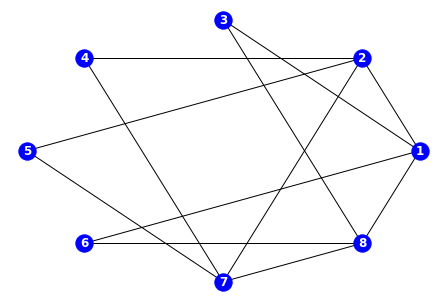

In [345]:
# Adiciona vértices em um loop
G = nx.Graph()
for v in range(1,8):
    G.add_node(v, color='k')
E = [(1,2), (1,3), (1,6), (1,8), (2,4), (2,5), (2,7), (3,8), (4,7), (5,7), (6,8), (7,8)]
G.add_edges_from(E)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color='b')

Todos os vértices de G são pares. Logo, G é Euleriano e possui um Circuito de Euler.
vertice de inicio: 1
Caminho de Euler:[1, 2, 4, 7, 2, 5, 7, 8, 1, 3, 8, 6, 1]


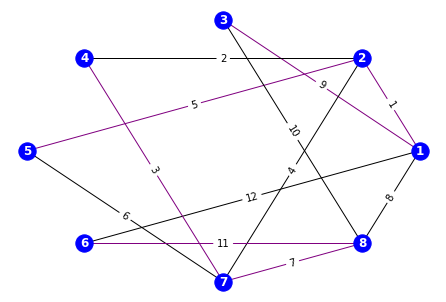

In [346]:
caminho_de_euler = algoritmo_fleury(G)
print(f'Caminho de Euler:{caminho_de_euler}')
mostra_caminho(caminho_de_euler)

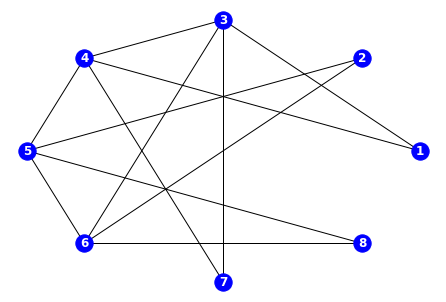

In [347]:
# Adiciona vértices em um loop
G = nx.Graph()
for v in range(1,8):
    G.add_node(v, color='k')
E = [(1,3), (1,4), (2,5), (2,6), (3,4), (3,6), (3,7), (4,5), (4,7), (5,6), (5,8), (6,8)]
G.add_edges_from(E)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color='b')

Todos os vértices de G são pares. Logo, G é Euleriano e possui um Circuito de Euler.
vertice de inicio: 1
Caminho de Euler:[1, 3, 4, 5, 2, 6, 5, 8, 6, 3, 7, 4, 1]


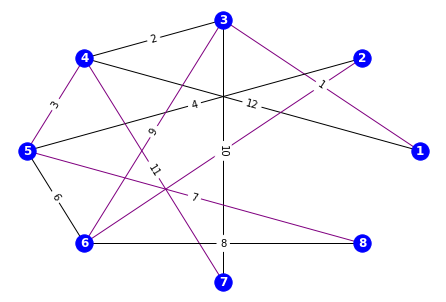

In [348]:
caminho_de_euler = algoritmo_fleury(G)
print(f'Caminho de Euler:{caminho_de_euler}')
mostra_caminho(caminho_de_euler)

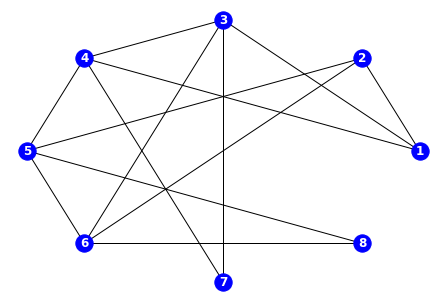

In [349]:
# Adiciona vértices em um loop
G = nx.Graph()
for v in range(1,8):
    G.add_node(v, color='k')
E = [(1,2),(1,3), (1,4), (2,5), (2,6), (3,4), (3,6), (3,7), (4,5), (4,7), (5,6), (5,8), (6,8)]
G.add_edges_from(E)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color='b')

G possui 2 vértices de grau impar:[1, 2]. Logo, G possui um caminho de Euler.
vertice de inicio: 1
Caminho de Euler:[1, 2, 5, 4, 1, 3, 4, 7, 3, 6, 5, 8, 6, 2]


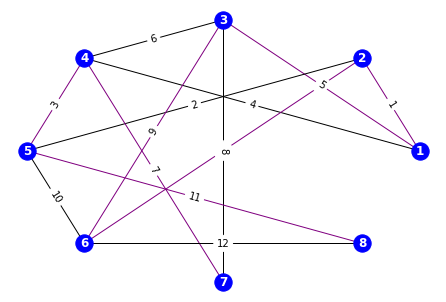

In [350]:
caminho_de_euler = algoritmo_fleury(G)
print(f'Caminho de Euler:{caminho_de_euler}')
mostra_caminho(caminho_de_euler)